In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap
import csv

In [3]:
df = pd.read_csv('train.csv')
df.tail()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,9.423771e+09,2.618201e+09,0.0,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,6.370097e+09,2.170973e+09,0.0,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,6.392336e+08,6.400000e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN
300,428,open,seoul,79,20011017,NaN,traditional_hospital,1.340971e+09,8.108450e+08,5.043409e+08,...,5.349000e+09,3.123072e+09,0.0,2.225928e+09,2.190000e+09,5.536178e+09,6.269440e+09,15.0,15.0,same


In [4]:
with open('train.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    header = next(csv_reader)
    
    all_hos = []
    close_hos = []
    
    for row in csv_reader:
        if row[15] != 'NA':
            all_hos.append(int(row[15]))
        if row[15] != 'NA':
            if row[1] == ' close':
                close_hos.append(int(row[15]))
    
    avg_all = round(sum(all_hos) / len(all_hos))
    avg_close = round(sum(close_hos) / len(close_hos))

    print('모든 병원 평균 순이익: ', '{:,}'.format(avg_all), '원')
    print('폐업 병원 평균 순이익: ', '{:,}'.format(avg_close), '원')


모든 병원 평균 순이익:  210,170,013 원
폐업 병원 평균 순이익:  4,120,362 원


In [12]:
def outliers_iqr(df):
    #column header 제거
    df.columns = df.iloc[0]
    df = df.reindex(df.index.drop(0)).reset_index(drop = True)
    df.columns.name = None
    
    #데이터 자료형을 numeric으로 바꿈
    df = df.apply(pd.to_numeric)
    
    q1, q3 = np.percentile(df, [15, 39])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where(df < upper_bound | data < lower_bound)

In [13]:
#NA 등의 결측치 값을 해결해야 함수 사용이 가능할 것으로 보임
outliers_iqr(df)

ValueError: Unable to parse string "open" at position 0

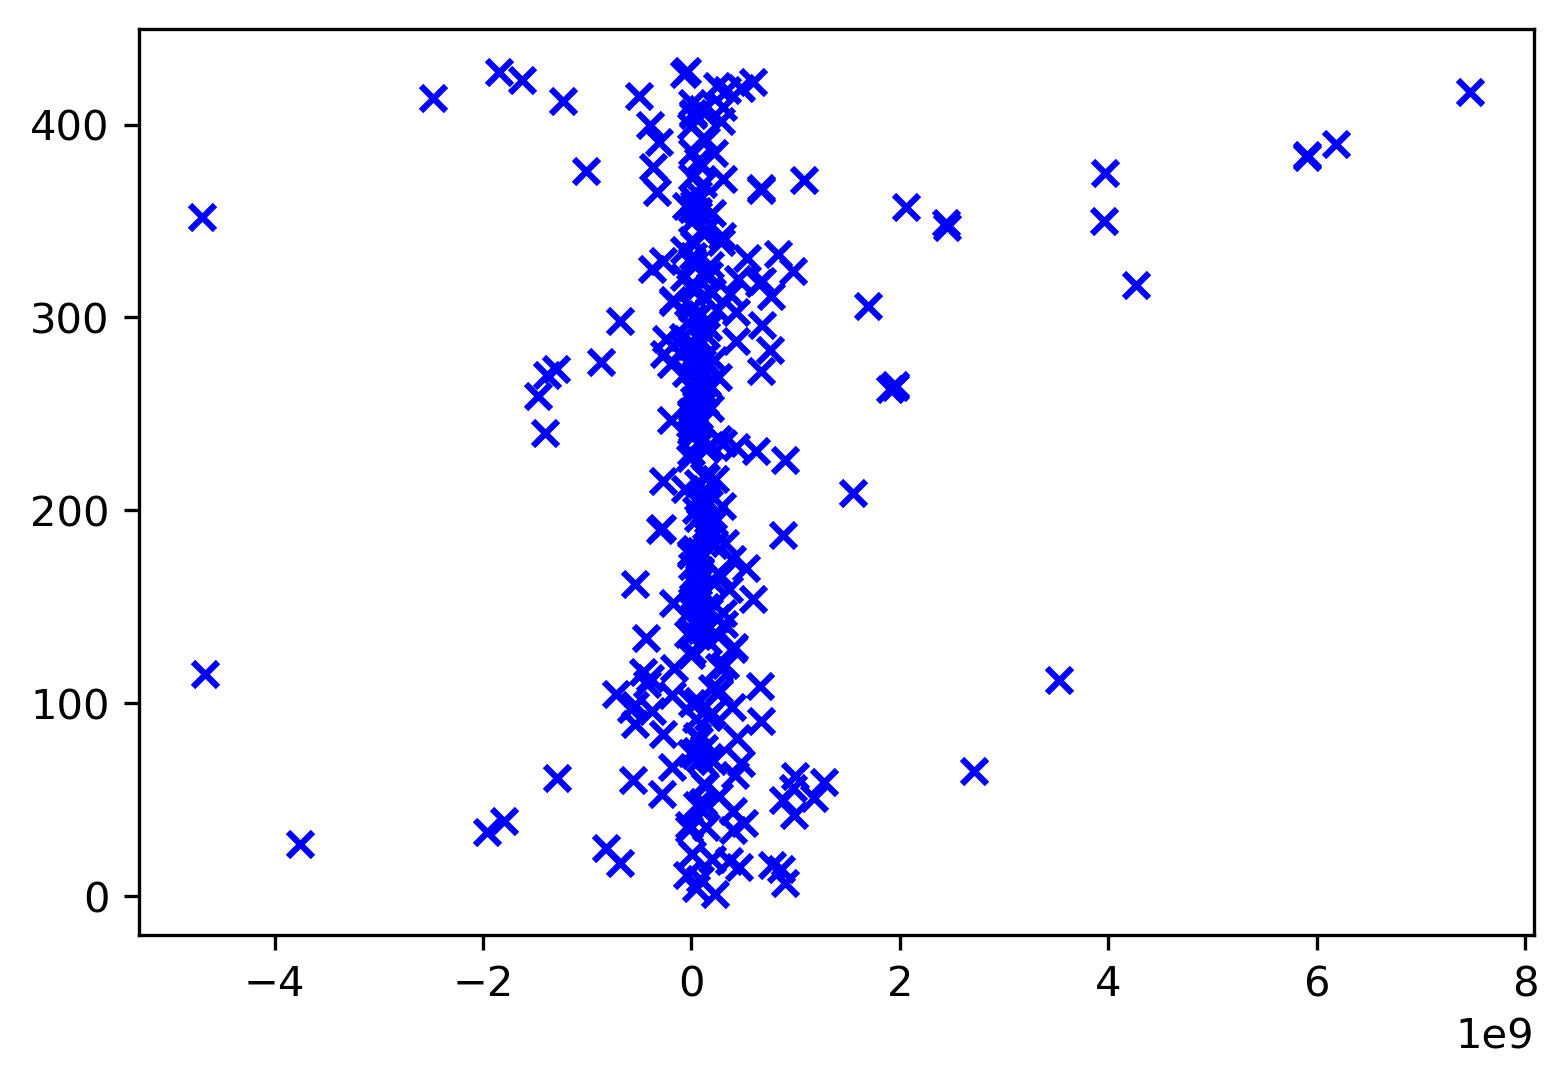

In [37]:
with open('train.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    header = next(csv_reader)
    
    pf = []
    hid = []
    
    for row in csv_reader:
        if row[15] != 'NA':
            pf.append(int(row[15]))
            hid.append(int(row[0]))

#산점도...???
plt.scatter(pf, hid, color = 'blue', marker = 'x', label = 'profit1')
plt.rcParams["figure.dpi"] = 300
plt.show()